/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3609 - loss: 1.7308 - val_accuracy: 0.5718 - val_loss: 1.1955
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5790 - loss: 1.1721 - val_accuracy: 0.6379 - val_loss: 1.0104
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6535 - loss: 0.9789 - val_accuracy: 0.6717 - val_loss: 0.9315
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7012 - loss: 0.8538 - val_accuracy: 0.6866 - val_loss: 0.9182
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7365 - loss: 0.7579 - val_accuracy: 0.6890 - val_loss: 0.9168
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7644 - loss: 0.6815 - val_accuracy: 0.6836 - val_loss: 0.9849
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7862 - loss: 0.6170 - val_accuracy: 0.6921 - val_loss: 0.9809
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8058 - loss: 0.5585 - 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3313 - loss: 1.7896 - val_accuracy: 0.5674 - val_loss: 1.2028
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5398 - loss: 1.2767 - val_accuracy: 0.6209 - val_loss: 1.0695
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5979 - loss: 1.1296 - val_accuracy: 0.6558 - val_loss: 0.9775
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6312 - loss: 1.0469 - val_accuracy: 0.6515 - val_loss: 1.0011
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6523 - loss: 0.9856 - val_accuracy: 0.6733 - val_loss: 0.9261
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6658 - loss: 0.9481 - val_accuracy: 0.6976 - val_loss: 0.8643
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6828 - loss: 0.8997 - val_accuracy: 0.7144 - val_loss: 0.8159
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6902 - loss: 0.88

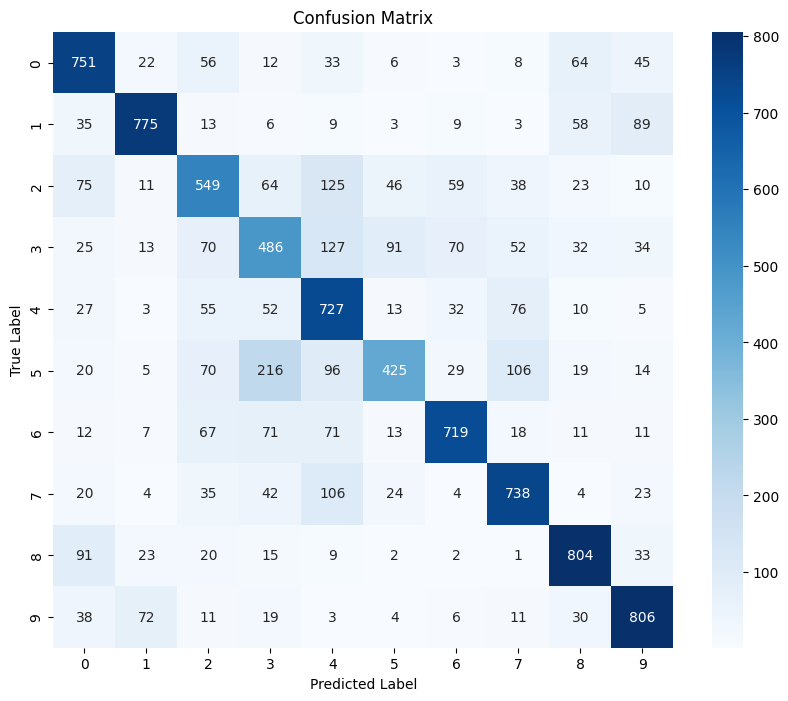

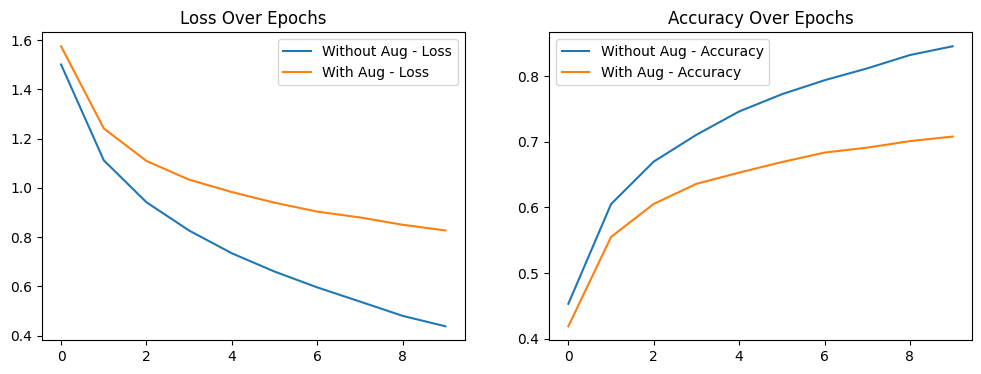

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.83      0.78      0.80      1000
           2       0.58      0.55      0.56      1000
           3       0.49      0.49      0.49      1000
           4       0.56      0.73      0.63      1000
           5       0.68      0.42      0.52      1000
           6       0.77      0.72      0.74      1000
           7       0.70      0.74      0.72      1000
           8       0.76      0.80      0.78      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
from datasets import load_dataset

# Load CIFAR-10 dataset
# data_path = "/kaggle/input/cifar-10-image-classification-with-cnn"
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
cifar10 = load_dataset('cifar10')

# Convert datasets to numpy arrays
train_images = np.array([np.array(x['img']) for x in cifar10['train']])
train_labels = np.array([x['label'] for x in cifar10['train']])
test_images = np.array([np.array(x['img']) for x in cifar10['test']])
test_labels = np.array([x['label'] for x in cifar10['test']])



# Normalize images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# CNN model
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train model without augmentation
cnn_model = create_cnn()
history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Train model with augmentation
cnn_model_aug = create_cnn()
history_aug = cnn_model_aug.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

# Evaluate both models
metrics = [cnn_model.evaluate(x_test, y_test), cnn_model_aug.evaluate(x_test, y_test)]

# Confusion Matrix
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# cnn_model.save("cnn_model_without_augmentation.h5")
# cnn_model_aug.save("cnn_model_with_augmentation.h5")


# Learning curve
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Without Aug - Loss')
plt.plot(history_aug.history['loss'], label='With Aug - Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Without Aug - Accuracy')
plt.plot(history_aug.history['accuracy'], label='With Aug - Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Print Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from datasets import load_dataset

In [ ]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#  load and preprocess the CIFAR-10 dataset
def load_and_preprocess_cifar10():
    print("Loading CIFAR-10 dataset from Hugging Face...")
    dataset = load_dataset("cifar10")
    
    #  training and test data
    train_data = dataset["train"]
    test_data = dataset["test"]
    
    X_train = np.array([np.array(img) for img in train_data["img"]])
    y_train = np.array(train_data["label"])
    
    X_test = np.array([np.array(img) for img in test_data["img"]])
    y_test = np.array(test_data["label"])
    
    print(f"Original dataset shapes: X_train: {X_train.shape}, X_test: {X_test.shape}")
    

    X_combined = np.concatenate((X_train, X_test), axis=0)
    y_combined = np.concatenate((y_train, y_test), axis=0)
    
    # Split into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y_combined, test_size=0.2, random_state=42
    )
    
    print(f"After 80/20 split: X_train: {X_train.shape}, X_test: {X_test.shape}")
    
    # Normalize pixel values to scale between 0 and 1
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0
    
    # Convert labels to one-hot encoded format
    y_train_one_hot = to_categorical(y_train, num_classes=10)
    y_test_one_hot = to_categorical(y_test, num_classes=10)
    
    return X_train, X_test, y_train, y_test, y_train_one_hot, y_test_one_hot

In [ ]:
#  CNN model
def create_cnn_model(num_conv_layers=3, num_filters=32, learning_rate=0.001):
    model = models.Sequential()
    
    # First convolutional layer
    model.add(layers.Conv2D(num_filters, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    #  convolutional layers
    filter_size = num_filters
    for i in range(1, num_conv_layers):
        filter_size *= 2  # Double the filters for each subsequent layer
        model.add(layers.Conv2D(filter_size, (3, 3), padding='same'))
        model.add(layers.BatchNormalization())
        model.add(layers.Activation('relu'))
        model.add(layers.MaxPooling2D((2, 2)))
    
    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model with the specified learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [ ]:
# train a model with or without data augmentation
def train_model(X_train, y_train_one_hot, X_test, y_test_one_hot, 
                use_augmentation=False, num_conv_layers=3, num_filters=32, 
                batch_size=32, learning_rate=0.001, epochs=30):
    
    model = create_cnn_model(num_conv_layers, num_filters, learning_rate)
    
    # Early stopping 
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    
    # Training start time
    start_time = time.time()
    
    if use_augmentation:
        print(f"Training model WITH augmentation: layers={num_conv_layers}, filters={num_filters}, batch_size={batch_size}, lr={learning_rate}")
        # Data augmentation configuration
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True,
            zoom_range=0.1
        )
        
        # Train with data augmentation
        datagen.fit(X_train)
        history = model.fit(
            datagen.flow(X_train, y_train_one_hot, batch_size=batch_size),
            steps_per_epoch=len(X_train) // batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test_one_hot),
            callbacks=[early_stopping]
        )
    else:
        print(f"Training model WITHOUT augmentation: layers={num_conv_layers}, filters={num_filters}, batch_size={batch_size}, lr={learning_rate}")
        # Train without data augmentation
        history = model.fit(
            X_train, y_train_one_hot,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test_one_hot),
            callbacks=[early_stopping]
        )
    
    # Calculate training time
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    return model, history, training_time



In [ ]:
# model evaluationn
def evaluate_model(model, X_test, y_test, y_test_one_hot):
    # Predict classes
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    
    #  metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Model Evaluation Metrics:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    
    return accuracy, precision, recall, f1, cm, y_pred


def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))
    

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


cnn_model.save("cnn_model_without_augmentation.h5")
cnn_model_aug.save("cnn_model_with_augmentation.h5")


def visualize_feature_maps(model, X_test, sample_idx=0):
  
    _ = model.predict(X_test[sample_idx:sample_idx+1])
    
    conv_layers = [layer for layer in model.layers if 'conv2d' in layer.name]
    
    for i, layer in enumerate(conv_layers):
        #  feature extraction 
        try:
            feature_model = models.Model(inputs=model.input, outputs=layer.output)
            
            
            sample_image = X_test[sample_idx:sample_idx+1]
            feature_maps = feature_model.predict(sample_image)
            
            num_feature_maps = min(16, feature_maps.shape[-1])  # Show at most 16 feature maps
            fig, axs = plt.subplots(4, 4, figsize=(12, 12))
            fig.suptitle(f'Feature Maps from Layer {layer.name}', fontsize=16)
            
            for j, ax in enumerate(axs.flat):
                if j < num_feature_maps:
                    ax.imshow(feature_maps[0, :, :, j], cmap='viridis')
                    ax.set_title(f'Filter {j}')
                ax.axis('off')
                
            plt.tight_layout()
            plt.subplots_adjust(top=0.9)
            plt.show()
            
            if i >= 2:
                break
                
        except Exception as e:
            print(f"Could not visualize layer {layer.name}: {e}")
            continue

In [ ]:
def run_ablation_study(X_train, y_train_one_hot, X_test, y_test, y_test_one_hot):
    results = []
    
    # Learning Rate 
    learning_rates = [0.001, 0.01, 0.1]
    for lr in learning_rates:
        print(f"\n--- Testing Learning Rate: {lr} ---")
        model, history, training_time = train_model(
            X_train, y_train_one_hot, X_test, y_test_one_hot,
            use_augmentation=False, learning_rate=lr, epochs=15 
        )
        accuracy, precision, recall, f1, _, _ = evaluate_model(model, X_test, y_test, y_test_one_hot)
        results.append({
            'parameter': 'Learning Rate',
            'value': lr,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time
        })
        
     
        plot_training_history(history, f'Learning Rate: {lr}')
    
    # Batch Size 
    batch_sizes = [16, 32, 64]
    for bs in batch_sizes:
        print(f"\n--- Testing Batch Size: {bs} ---")
        model, history, training_time = train_model(
            X_train, y_train_one_hot, X_test, y_test_one_hot,
            use_augmentation=False, batch_size=bs, epochs=15  
        )
        accuracy, precision, recall, f1, _, _ = evaluate_model(model, X_test, y_test, y_test_one_hot)
        results.append({
            'parameter': 'Batch Size',
            'value': bs,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time
        })
        
        
        plot_training_history(history, f'Batch Size: {bs}')
    
    # Number of Filters 
    filter_counts = [16, 32, 64]
    for filters in filter_counts:
        print(f"\n--- Testing Initial Filters: {filters} ---")
        model, history, training_time = train_model(
            X_train, y_train_one_hot, X_test, y_test_one_hot,
            use_augmentation=False, num_filters=filters, epochs=15  
        )
        accuracy, precision, recall, f1, _, _ = evaluate_model(model, X_test, y_test, y_test_one_hot)
        results.append({
            'parameter': 'Number of Filters',
            'value': filters,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time
        })
        
    
        plot_training_history(history, f'Initial Filters: {filters}')
    
    # Number of Layers 
    layer_counts = [3, 5, 7]
    for layers in layer_counts:
        print(f"\n--- Testing Conv Layers: {layers} ---")
        model, history, training_time = train_model(
            X_train, y_train_one_hot, X_test, y_test_one_hot,
            use_augmentation=False, num_conv_layers=layers, epochs=15 
        )
        accuracy, precision, recall, f1, _, _ = evaluate_model(model, X_test, y_test, y_test_one_hot)
        results.append({
            'parameter': 'Number of Layers',
            'value': layers,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'training_time': training_time
        })
        
        
        plot_training_history(history, f'Conv Layers: {layers}')
    
    return results


In [ ]:
# visualize results
def display_ablation_results(results):
  
    param_groups = {}
    for result in results:
        param = result['parameter']
        if param not in param_groups:
            param_groups[param] = []
        param_groups[param].append(result)
    
 
    for param, group in param_groups.items():
        print(f"\n{param} Impact on Model Performance:")
        print(f"{'Value':<10} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Time (s)':<10}")
        print("-" * 60)
        for result in group:
            print(f"{result['value']:<10} {result['accuracy']:.4f}     {result['precision']:.4f}     "
                  f"{result['recall']:.4f}     {result['f1']:.4f}     {result['training_time']:.1f}")
    
    
    for param, group in param_groups.items():
        values = [str(result['value']) for result in group]
        accuracies = [result['accuracy'] for result in group]
        training_times = [result['training_time'] for result in group]
        
        plt.figure(figsize=(12, 5))
        

        plt.subplot(1, 2, 1)
        plt.bar(values, accuracies, color='skyblue')
        plt.title(f'{param} vs. Accuracy')
        plt.xlabel(param)
        plt.ylabel('Accuracy')
        plt.ylim(0.7, 0.9)  
        
        
        plt.subplot(1, 2, 2)
        plt.bar(values, training_times, color='salmon')
        plt.title(f'{param} vs. Training Time')
        plt.xlabel(param)
        plt.ylabel('Training Time (seconds)')
        
        plt.tight_layout()
        plt.show()

Loading CIFAR-10 dataset from Hugging Face...
Original dataset shapes: X_train: (50000, 32, 32, 3), X_test: (10000, 32, 32, 3)
After 80/20 split: X_train: (48000, 32, 32, 3), X_test: (12000, 32, 32, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.001
Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3685 - loss: 1.8579 - val_accuracy: 0.5608 - val_loss: 1.2401
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5662 - loss: 1.2153 - val_accuracy: 0.6007 - val_loss: 1.1336
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6332 - loss: 1.0456 - val_accuracy: 0.6139 - val_loss: 1.0826
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6749 - loss: 0.9341 - val_accuracy: 0.5815 - val_loss: 1.2213
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7059 - loss: 0.8485 - val_accuracy: 0.6083 - val_loss: 1.2021
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7335 - loss: 0.7720 - val_accuracy: 0.6527 - val_loss: 1.0565
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7567 - loss: 0.6987 - val_accuracy: 0.7340 - val_loss: 0.7967
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.3196 - loss: 1.9761 - val_accuracy: 0.4708 - val_loss: 1.4634
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4708 - val_loss: 1.4634
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.4812 - loss: 1.4253 - val_accuracy: 0.4891 - val_loss: 1.6223
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4891 - val_loss: 1.6223
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.5551 - loss: 1.2489 - val_accuracy: 0.5859 - val_loss: 1.2195
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5859 - val_loss: 1.2195
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.5879 - loss: 1.1636 - val_accuracy: 0.6539 - val_loss: 0.9485
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6539 - val_loss: 0.9485
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step

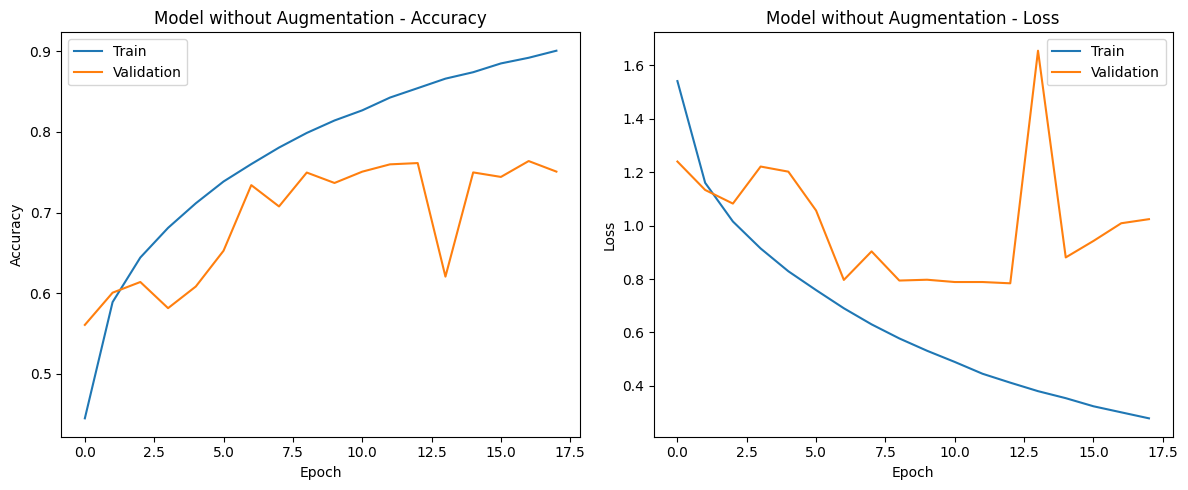

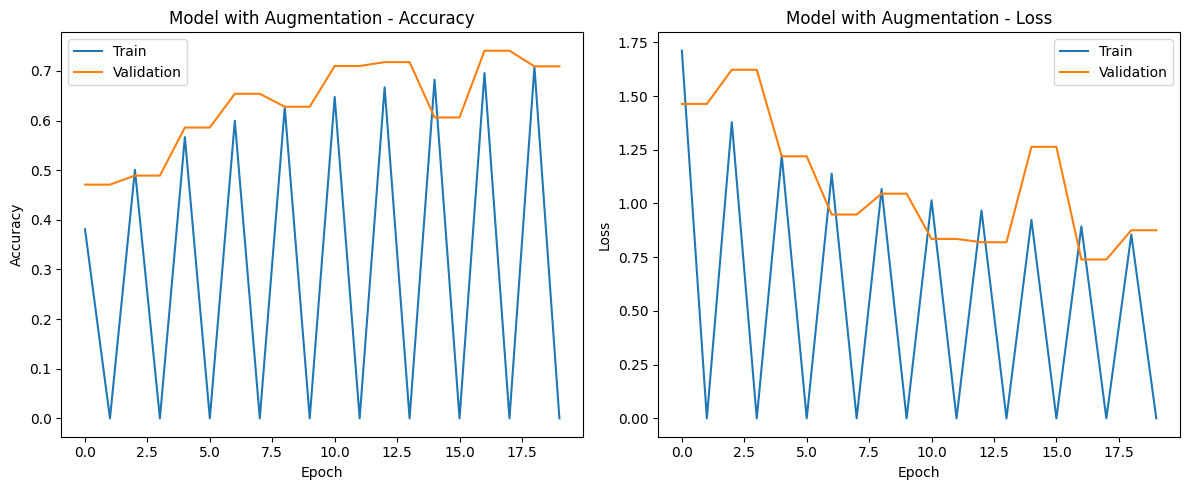

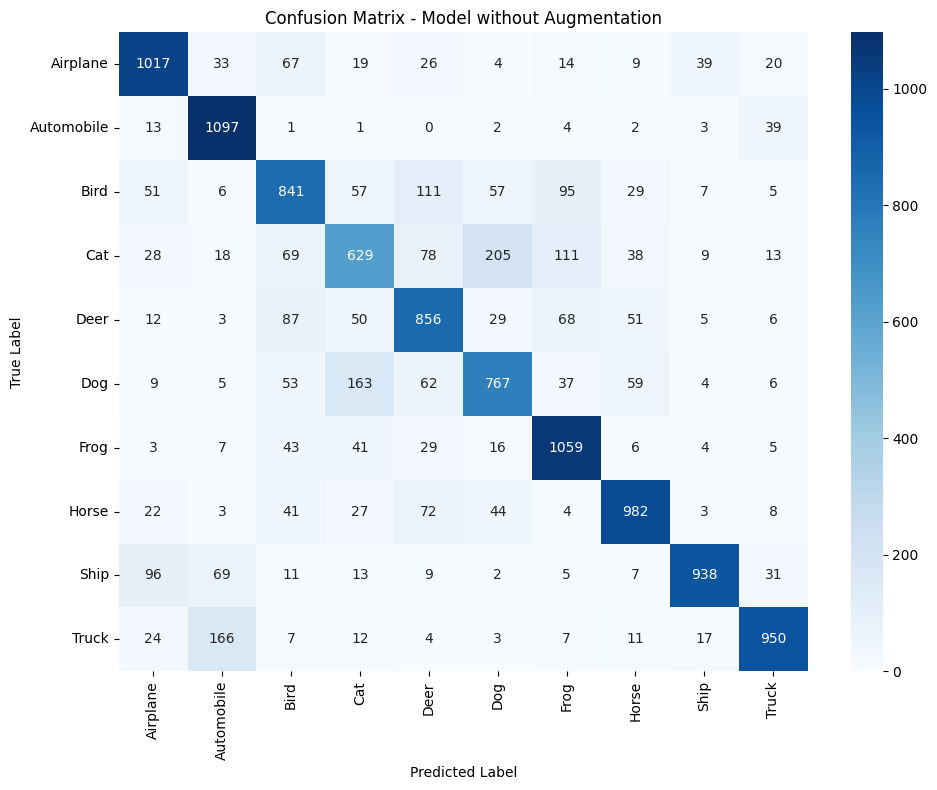

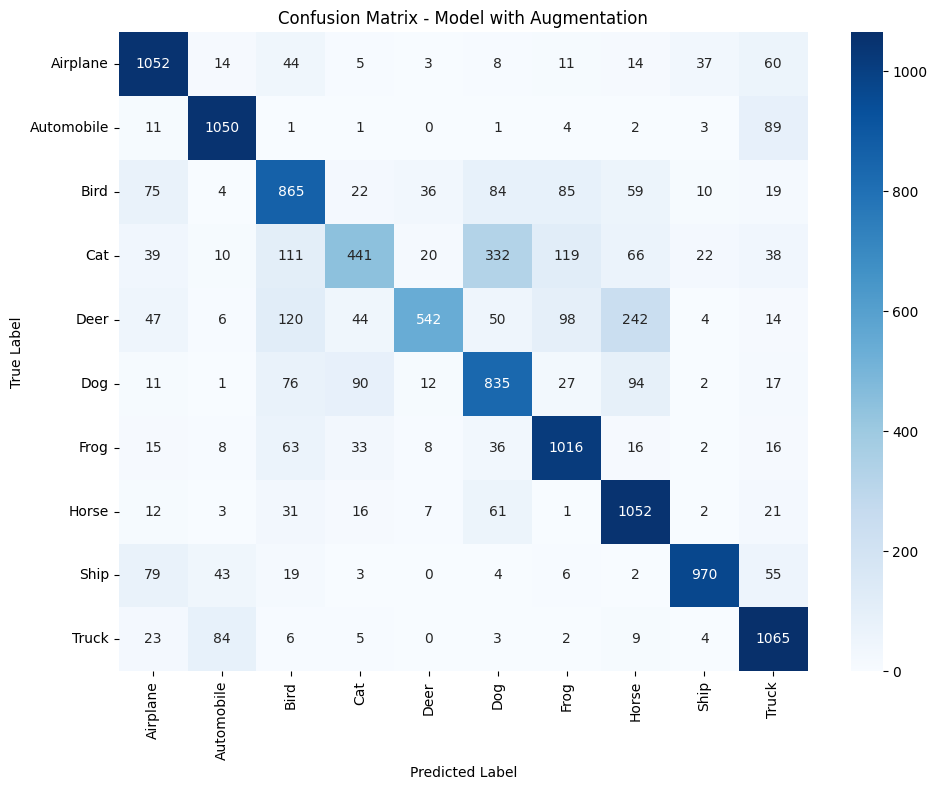


Visualizing feature maps from the model without augmentation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
Could not visualize layer conv2d_12: The layer sequential_4 has never been called and thus has no defined input.
Could not visualize layer conv2d_13: The layer sequential_4 has never been called and thus has no defined input.
Could not visualize layer conv2d_14: The layer sequential_4 has never been called and thus has no defined input.

Running ablation study (this may take some time)...

--- Testing Learning Rate: 0.001 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3452 - loss: 1.8868 - val_accuracy: 0.5077 - val_loss: 1.3989
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5415 - loss: 1.2770 - val_accuracy: 0.5247 - val_loss: 1.3765
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6134 - loss: 1.0924 - val_accuracy: 0.6297 - val_loss: 1.0428
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6544 - loss: 0.9869 - val_accuracy: 0.6561 - val_loss: 0.9672
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6871 - loss: 0.9017 - val_accuracy: 0.6600 - val_loss: 1.0308
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7183 - loss: 0.8155 - val_accuracy: 0.6536 - val_loss: 1.0646
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7388 - loss: 0.7465 - val_accuracy: 0.6839 - val_loss: 0.9530
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7644 - loss: 0.6789 -

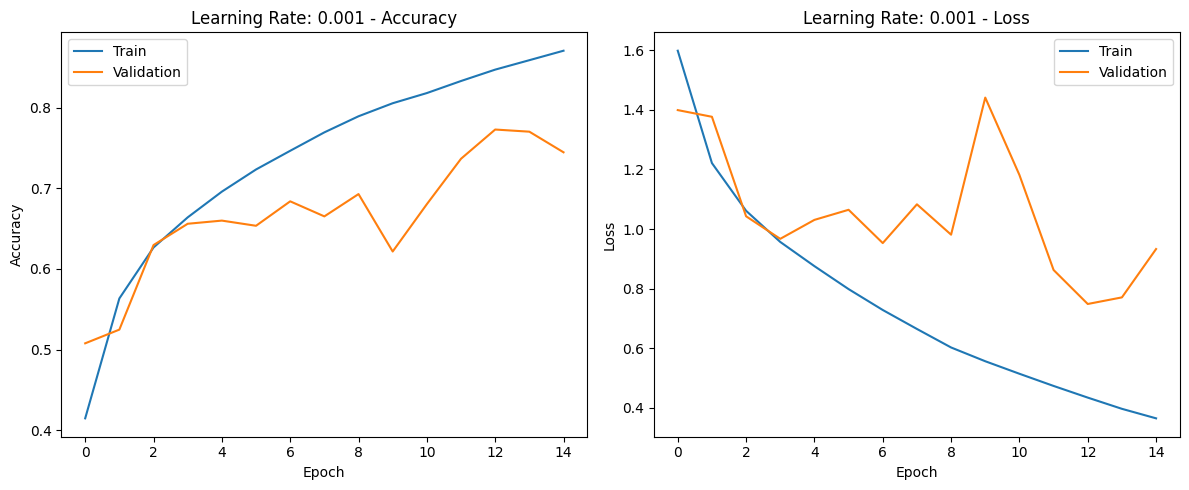


--- Testing Learning Rate: 0.01 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.01


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.2169 - loss: 3.6267 - val_accuracy: 0.3549 - val_loss: 1.9290
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3939 - loss: 1.6216 - val_accuracy: 0.5425 - val_loss: 1.2666
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4752 - loss: 1.4442 - val_accuracy: 0.5065 - val_loss: 1.3895
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5231 - loss: 1.3251 - val_accuracy: 0.5215 - val_loss: 1.3552
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5573 - loss: 1.2507 - val_accuracy: 0.5918 - val_loss: 1.1921
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5867 - loss: 1.1776 - val_accuracy: 0.6055 - val_loss: 1.1549
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6062 - loss: 1.1253 - val_accuracy: 0.6339 - val_loss: 1.0829
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6197 - loss: 1.0898 -

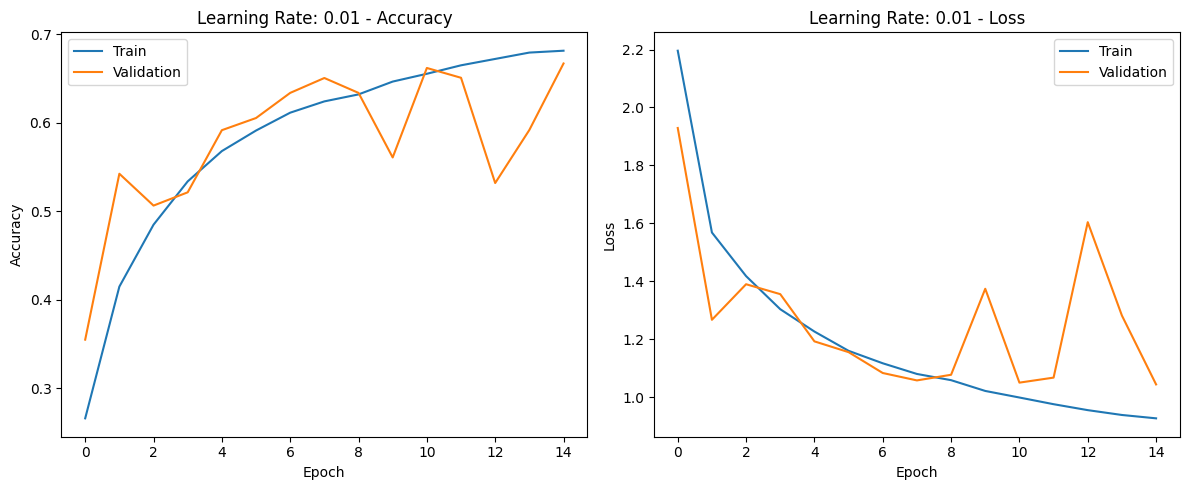


--- Testing Learning Rate: 0.1 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0997 - loss: 19.7241 - val_accuracy: 0.0968 - val_loss: 2.3125
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1015 - loss: 2.3156 - val_accuracy: 0.0968 - val_loss: 2.3126
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1021 - loss: 2.3172 - val_accuracy: 0.0968 - val_loss: 2.3126
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1018 - loss: 2.3157 - val_accuracy: 0.0968 - val_loss: 2.3127
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1018 - loss: 2.3157 - val_accuracy: 0.0968 - val_loss: 2.3127
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1018 - loss: 2.3157 - val_accuracy: 0.0968 - val_loss: 2.3127
Training completed in 34.36 seconds
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Model Evaluation Metrics:
  Accuracy:  0.0968
  Precision: 0.0094
  Recall:    0.0968
  F1-Score:  0.0171


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


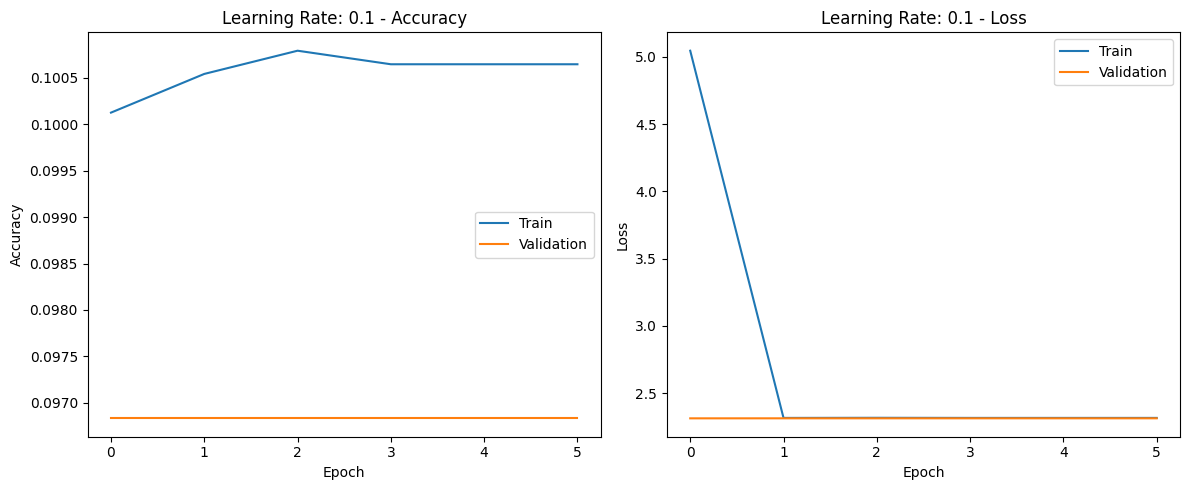


--- Testing Batch Size: 16 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=16, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.3460 - loss: 1.8754 - val_accuracy: 0.5594 - val_loss: 1.2202
Epoch 2/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5472 - loss: 1.2745 - val_accuracy: 0.6419 - val_loss: 1.0338
Epoch 3/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6187 - loss: 1.0874 - val_accuracy: 0.6983 - val_loss: 0.8775
Epoch 4/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6649 - loss: 0.9620 - val_accuracy: 0.6852 - val_loss: 0.9103
Epoch 5/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7019 - loss: 0.8546 - val_accuracy: 0.7188 - val_loss: 0.8491
Epoch 6/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7328 - loss: 0.7653 - val_accuracy: 0.7212 - val_loss: 0.8449
Epoch 7/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7635 - loss: 0.6916 - val_accuracy: 0.7050 - val_loss: 0.9027
Epoch 8/15
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7837 - loss: 0.6179 -

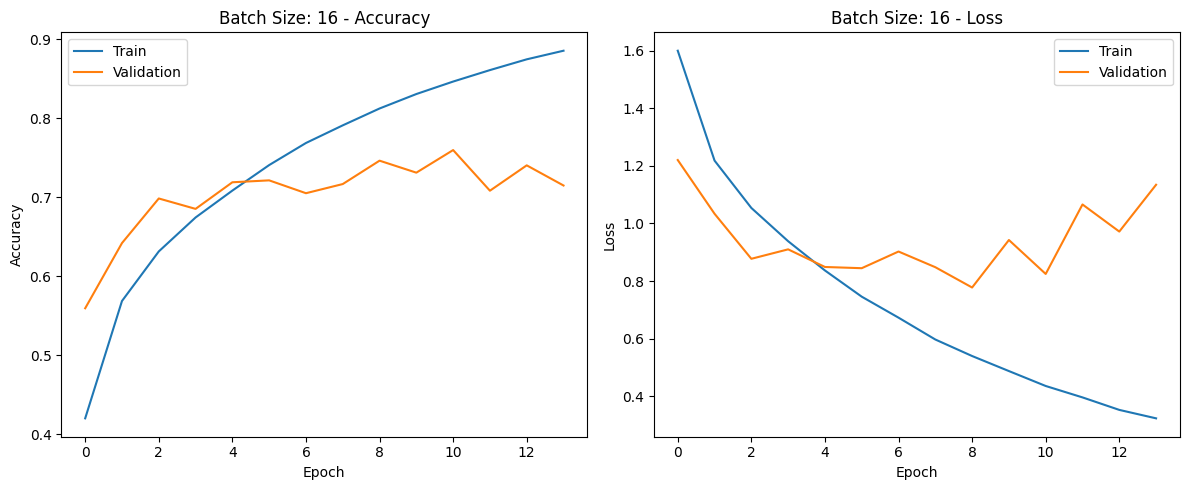


--- Testing Batch Size: 32 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3488 - loss: 1.9153 - val_accuracy: 0.5502 - val_loss: 1.2412
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5473 - loss: 1.2615 - val_accuracy: 0.6141 - val_loss: 1.1078
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6148 - loss: 1.0858 - val_accuracy: 0.6067 - val_loss: 1.1176
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6568 - loss: 0.9916 - val_accuracy: 0.6934 - val_loss: 0.8604
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6928 - loss: 0.8837 - val_accuracy: 0.6457 - val_loss: 1.0775
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7173 - loss: 0.8146 - val_accuracy: 0.6448 - val_loss: 1.0516
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7368 - loss: 0.7519 - val_accuracy: 0.6876 - val_loss: 0.9631
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7580 - loss: 0.6957 -

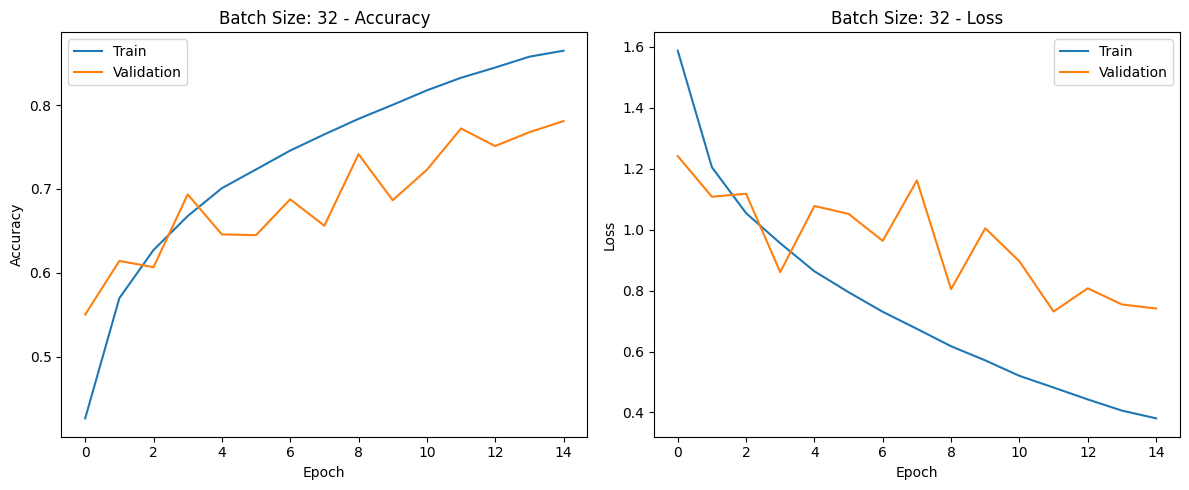


--- Testing Batch Size: 64 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=64, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3685 - loss: 1.8541 - val_accuracy: 0.5526 - val_loss: 1.2359
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5639 - loss: 1.2203 - val_accuracy: 0.6089 - val_loss: 1.1305
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6334 - loss: 1.0469 - val_accuracy: 0.6066 - val_loss: 1.1106
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6707 - loss: 0.9403 - val_accuracy: 0.6331 - val_loss: 1.0173
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7042 - loss: 0.8436 - val_accuracy: 0.6563 - val_loss: 1.0488
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7253 - loss: 0.7863 - val_accuracy: 0.7188 - val_loss: 0.8131
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7489 - loss: 0.7204 - val_accuracy: 0.7355 - val_loss: 0.7586
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7711 - loss: 0.6560 - val_accuracy: 0

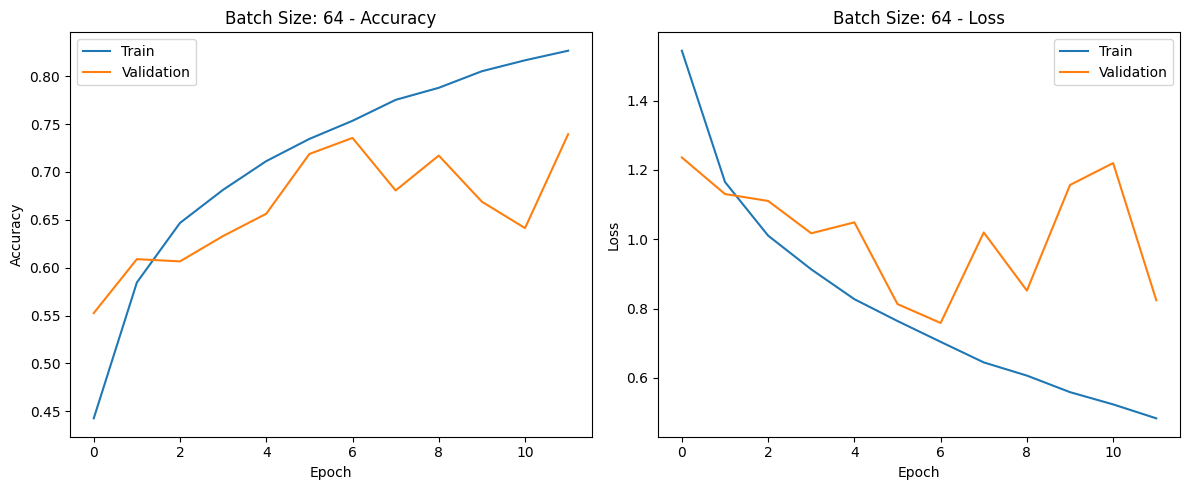


--- Testing Initial Filters: 16 ---
Training model WITHOUT augmentation: layers=3, filters=16, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.3698 - loss: 1.7697 - val_accuracy: 0.5733 - val_loss: 1.1761
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5589 - loss: 1.2251 - val_accuracy: 0.5431 - val_loss: 1.3848
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6296 - loss: 1.0464 - val_accuracy: 0.5964 - val_loss: 1.1807
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6642 - loss: 0.9511 - val_accuracy: 0.6806 - val_loss: 0.9091
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6971 - loss: 0.8657 - val_accuracy: 0.6808 - val_loss: 0.9228
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7161 - loss: 0.8136 - val_accuracy: 0.6790 - val_loss: 0.9324
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7353 - loss: 0.7539 - val_accuracy: 0.6671 - val_loss: 1.0151
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7515 - loss: 0.7072 -

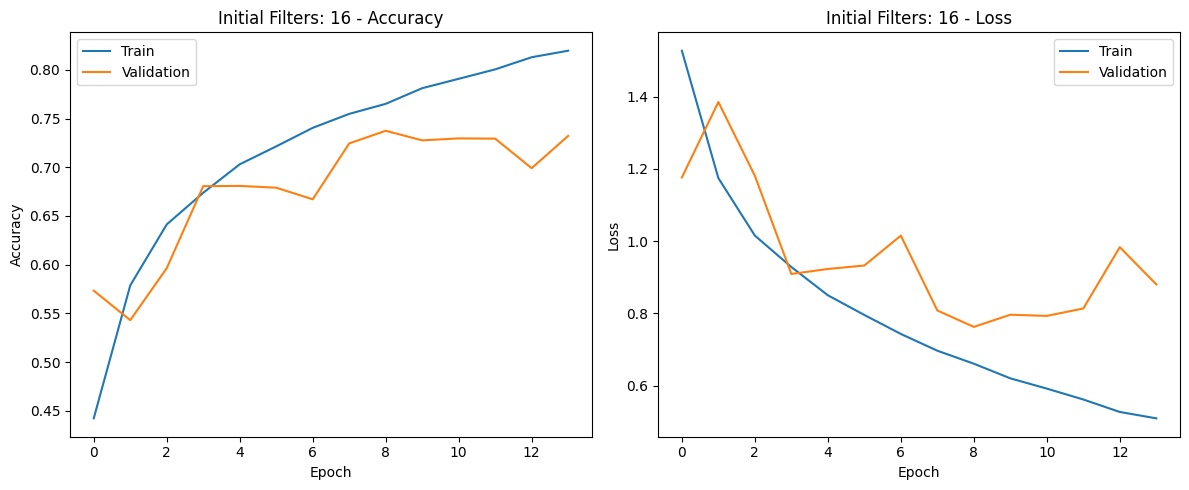


--- Testing Initial Filters: 32 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3494 - loss: 1.8793 - val_accuracy: 0.3814 - val_loss: 1.9506
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5449 - loss: 1.2633 - val_accuracy: 0.6150 - val_loss: 1.0678
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6182 - loss: 1.0833 - val_accuracy: 0.6733 - val_loss: 0.9232
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6610 - loss: 0.9737 - val_accuracy: 0.6763 - val_loss: 0.9140
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6905 - loss: 0.8844 - val_accuracy: 0.7153 - val_loss: 0.8011
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7176 - loss: 0.8059 - val_accuracy: 0.6439 - val_loss: 1.1122
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7452 - loss: 0.7322 - val_accuracy: 0.6334 - val_loss: 1.1695
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7634 - loss: 0.6853 -

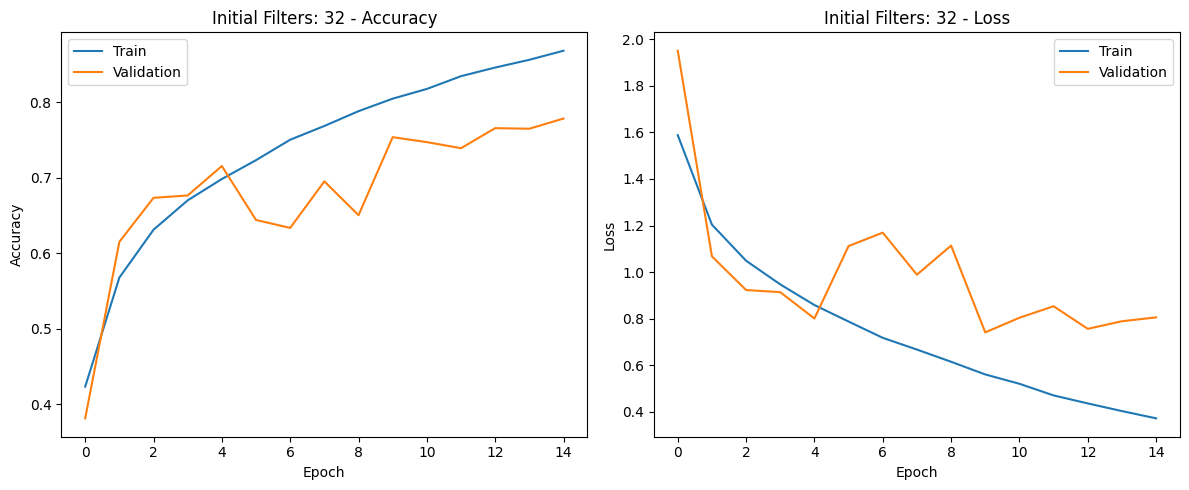


--- Testing Initial Filters: 64 ---
Training model WITHOUT augmentation: layers=3, filters=64, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3115 - loss: 2.1801 - val_accuracy: 0.5005 - val_loss: 1.3333
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4809 - loss: 1.4049 - val_accuracy: 0.5494 - val_loss: 1.2508
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5549 - loss: 1.2304 - val_accuracy: 0.6302 - val_loss: 1.0296
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6036 - loss: 1.1043 - val_accuracy: 0.6687 - val_loss: 0.9429
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6361 - loss: 1.0151 - val_accuracy: 0.6694 - val_loss: 0.9299
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6581 - loss: 0.9307 - val_accuracy: 0.6807 - val_loss: 0.9087
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6842 - loss: 0.8677 - val_accuracy: 0.6722 - val_loss: 0.9681
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7094 - loss: 0.7967 -

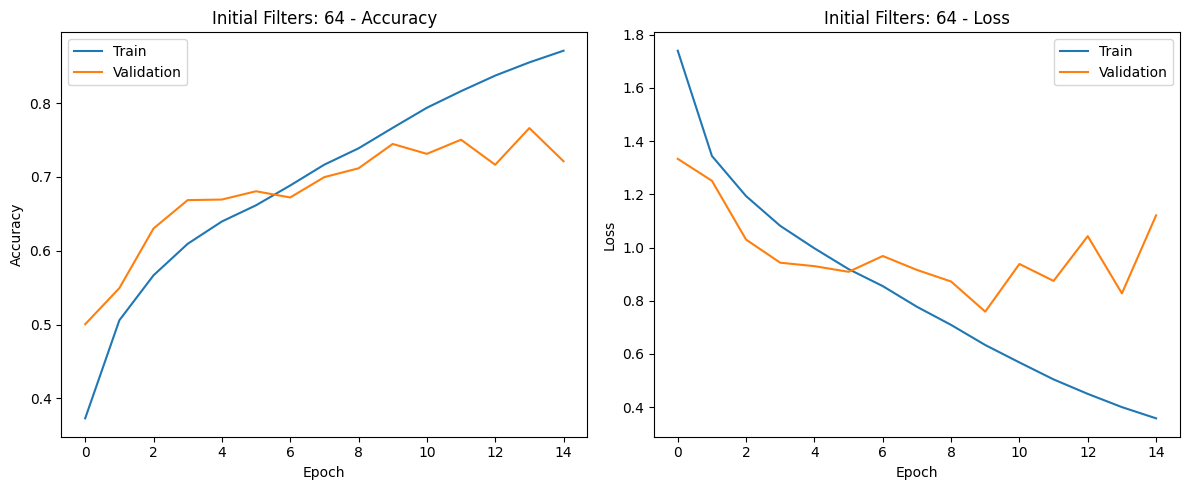


--- Testing Conv Layers: 3 ---
Training model WITHOUT augmentation: layers=3, filters=32, batch_size=32, lr=0.001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3572 - loss: 1.8415 - val_accuracy: 0.5309 - val_loss: 1.2680
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5449 - loss: 1.2589 - val_accuracy: 0.5867 - val_loss: 1.1999
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6182 - loss: 1.0814 - val_accuracy: 0.6297 - val_loss: 1.0618
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6632 - loss: 0.9662 - val_accuracy: 0.6083 - val_loss: 1.1632
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6906 - loss: 0.8808 - val_accuracy: 0.6292 - val_loss: 1.0605
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7251 - loss: 0.7958 - val_accuracy: 0.6423 - val_loss: 1.0649
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7491 - loss: 0.7257 - val_accuracy: 0.6708 - val_loss: 0.9549
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7679 - loss: 0.6605 -

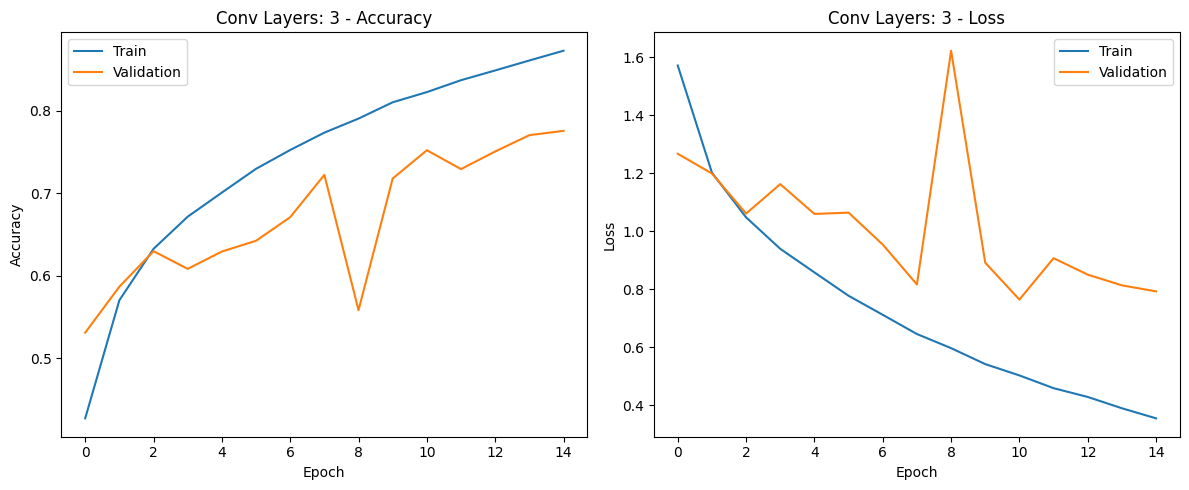


--- Testing Conv Layers: 5 ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model WITHOUT augmentation: layers=5, filters=32, batch_size=32, lr=0.001
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.3868 - loss: 1.7238 - val_accuracy: 0.5473 - val_loss: 1.2783
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6181 - loss: 1.0887 - val_accuracy: 0.5888 - val_loss: 1.2673
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7030 - loss: 0.8701 - val_accuracy: 0.6465 - val_loss: 1.0620
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7546 - loss: 0.7217 - val_accuracy: 0.6345 - val_loss: 1.2517
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7976 - loss: 0.6001 - val_accuracy: 0.7093 - val_loss: 0.9033
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8328 - loss: 0.4997 - val_accuracy: 0.7314 - val_loss: 0.9069
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8637 - loss: 0.4051 - val_accuracy: 0.7118 - val_loss: 1.0034
Epoch 

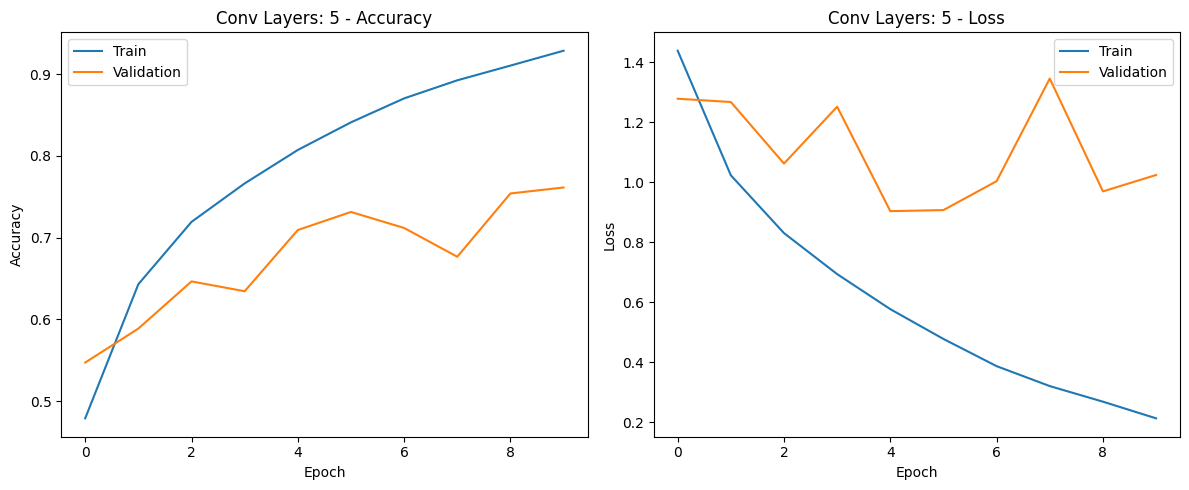


--- Testing Conv Layers: 7 ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model WITHOUT augmentation: layers=7, filters=32, batch_size=32, lr=0.001
Epoch 1/15
Error during ablation study: Exception encountered when calling MaxPooling2D.call().

Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_17_1/max_pooling2d_56_1/MaxPool2d}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_17_1/activation_52_1/Relu)' with input shapes: [32,1,1,1024].

Arguments received by MaxPooling2D.call():
  • inputs=tf.Tensor(shape=(32, 1, 1, 1024), dtype=float32)
Continuing with the rest of the evaluation...

Performance Metrics Comparison of CNN Models:
Model                     Accuracy   Precision  Recall     F1-Score  
-----------------------------------------------------------------
Without Augmentation      0.7613     0.7619     0.7613     0.7593
With Augmentation         0.7407     0.7491     0.7407     0.7316


In [8]:
def main():

    X_train, X_test, y_train, y_test, y_train_one_hot, y_test_one_hot = load_and_preprocess_cifar10()
    
   
    model_no_aug, history_no_aug, _ = train_model(
        X_train, y_train_one_hot, X_test, y_test_one_hot,
        use_augmentation=False, epochs=20  # Reduced epochs for faster testing
    )
    
    
    model_aug, history_aug, _ = train_model(
        X_train, y_train_one_hot, X_test, y_test_one_hot,
        use_augmentation=True, epochs=20  # Reduced epochs for faster testing
    )
    
 
    print("\nEvaluating model WITHOUT augmentation:")
    acc_no_aug, prec_no_aug, rec_no_aug, f1_no_aug, cm_no_aug, y_pred_no_aug = evaluate_model(
        model_no_aug, X_test, y_test, y_test_one_hot
    )
    
    
    print("\nEvaluating model WITH augmentation:")
    acc_aug, prec_aug, rec_aug, f1_aug, cm_aug, y_pred_aug = evaluate_model(
        model_aug, X_test, y_test, y_test_one_hot
    )
    
   
    plot_training_history(history_no_aug, 'Model without Augmentation')
    plot_training_history(history_aug, 'Model with Augmentation')
    
   
    class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
                   'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
   
    plot_confusion_matrix(cm_no_aug, class_names, 'Model without Augmentation')
    plot_confusion_matrix(cm_aug, class_names, 'Model with Augmentation')
    
   
    try:
        print("\nVisualizing feature maps from the model without augmentation:")
        visualize_feature_maps(model_no_aug, X_test)
    except Exception as e:
        print(f"Error visualizing feature maps: {e}")
        print("Continuing with the rest of the evaluation...")
    

    print("\nRunning ablation study (this may take some time)...")
    try:
        ablation_results = run_ablation_study(
            X_train, y_train_one_hot, X_test, y_test, y_test_one_hot
        )
        
       
        display_ablation_results(ablation_results)
    except Exception as e:
        print(f"Error during ablation study: {e}")
        print("Continuing with the rest of the evaluation...")
    
 
    print("\nPerformance Metrics Comparison of CNN Models:")
    print(f"{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
    print("-" * 65)
    print(f"{'Without Augmentation':<25} {acc_no_aug:.4f}     {prec_no_aug:.4f}     {rec_no_aug:.4f}     {f1_no_aug:.4f}")
    print(f"{'With Augmentation':<25} {acc_aug:.4f}     {prec_aug:.4f}     {rec_aug:.4f}     {f1_aug:.4f}")
  


if __name__ == "__main__":
    main()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:

model_without_aug = load_model("cnn_model_without_augmentation.h5")
model_with_aug = load_model("cnn_model_with_augmentation.h5")


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
def display_test_samples(x_test, y_test, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(0, len(x_test))
        img = x_test[idx]
        label = np.argmax(y_test[idx])
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"{class_names[label]}")
        plt.axis('off')
    
    plt.suptitle("Sample Test Images", fontsize=16)
    plt.tight_layout()
    plt.show()

# Display some test samples
display_test_samples(x_test, y_test)

#  predictions with both models
y_pred_without_aug = np.argmax(model_without_aug.predict(x_test), axis=1)
y_pred_with_aug = np.argmax(model_with_aug.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrices for both models
conf_matrix_without_aug = confusion_matrix(y_true, y_pred_without_aug)
conf_matrix_with_aug = confusion_matrix(y_true, y_pred_with_aug)

#  confusion matrices
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_without_aug, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Without Augmentation')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_with_aug, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - With Augmentation')
plt.tight_layout()
plt.show()

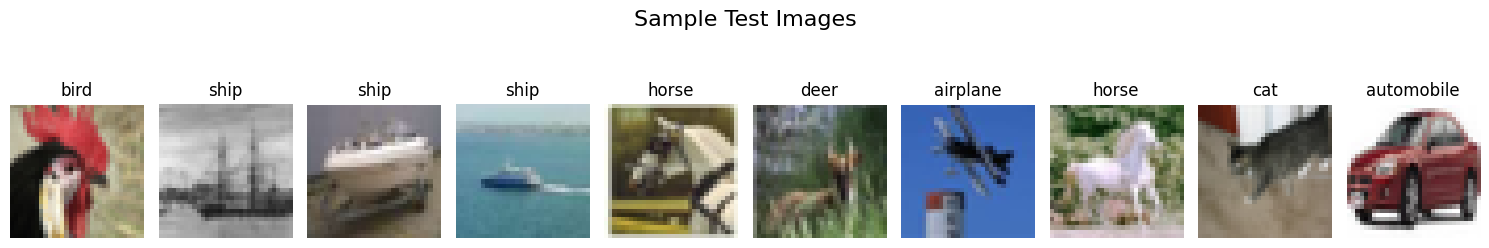

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


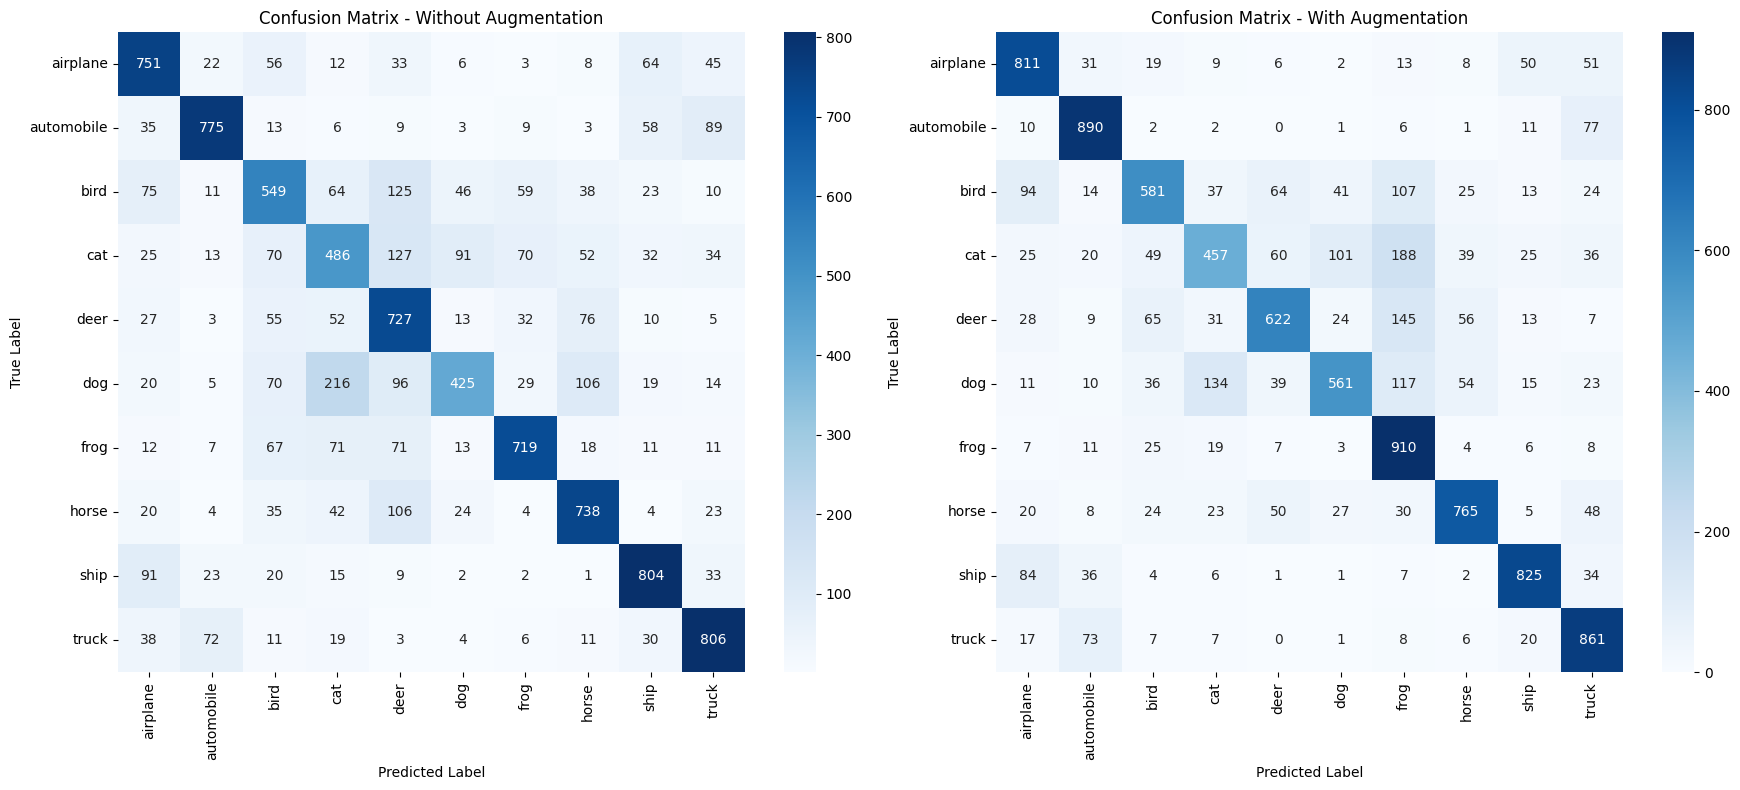

Classification Report - Without Augmentation:
              precision    recall  f1-score   support

    airplane       0.69      0.75      0.72      1000
  automobile       0.83      0.78      0.80      1000
        bird       0.58      0.55      0.56      1000
         cat       0.49      0.49      0.49      1000
        deer       0.56      0.73      0.63      1000
         dog       0.68      0.42      0.52      1000
        frog       0.77      0.72      0.74      1000
       horse       0.70      0.74      0.72      1000
        ship       0.76      0.80      0.78      1000
       truck       0.75      0.81      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000


Classification Report - With Augmentation:
              precision    recall  f1-score   support

    airplane       0.73      0.81      0.77      1000
  automobile       0.81      0.89      0.8

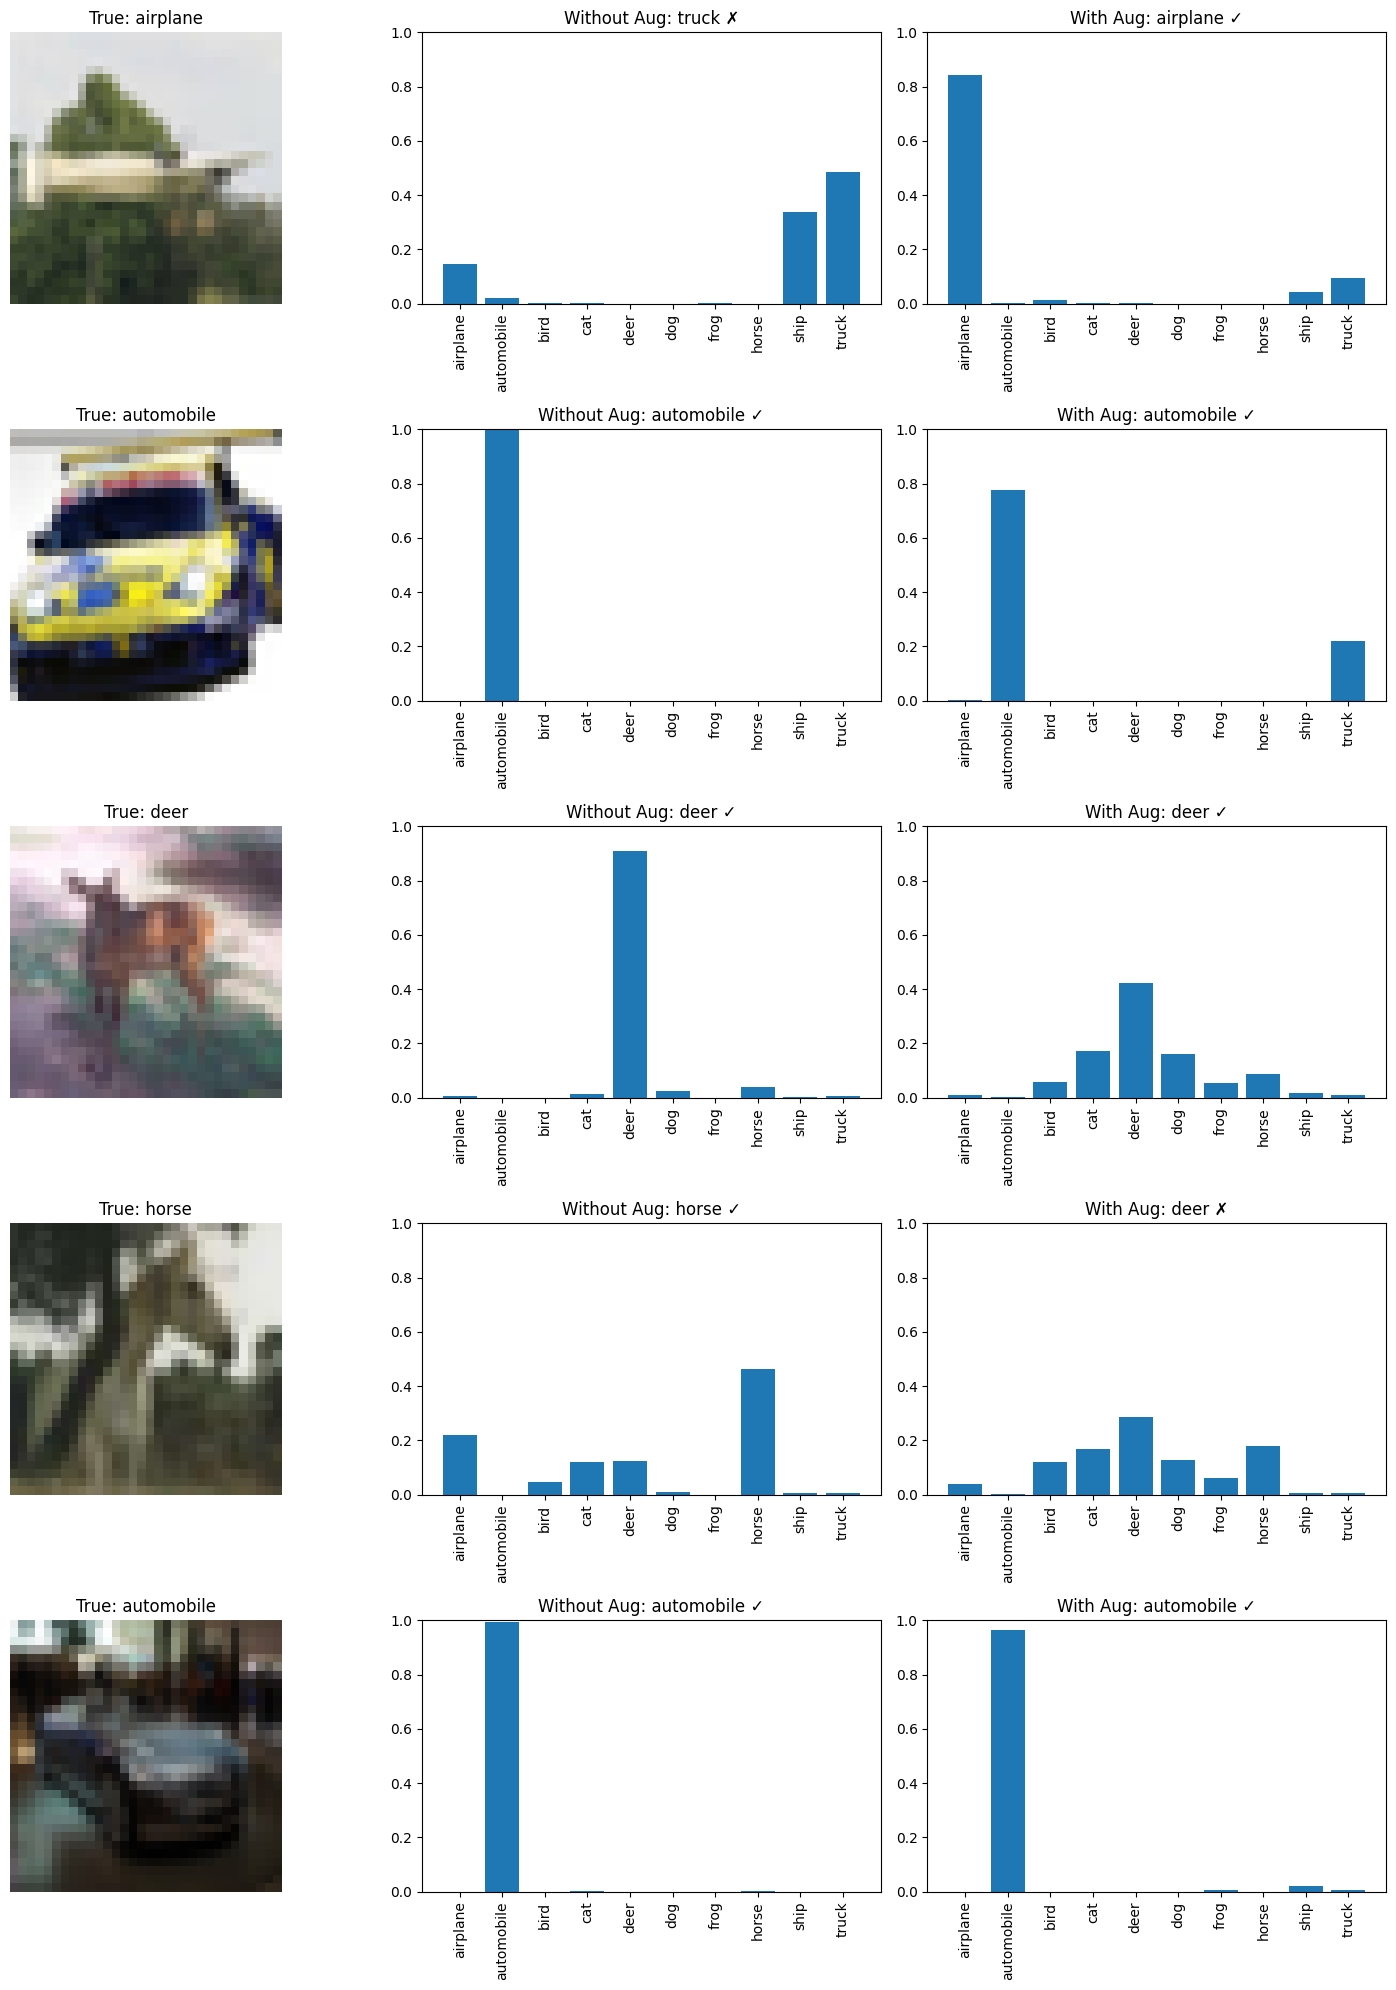

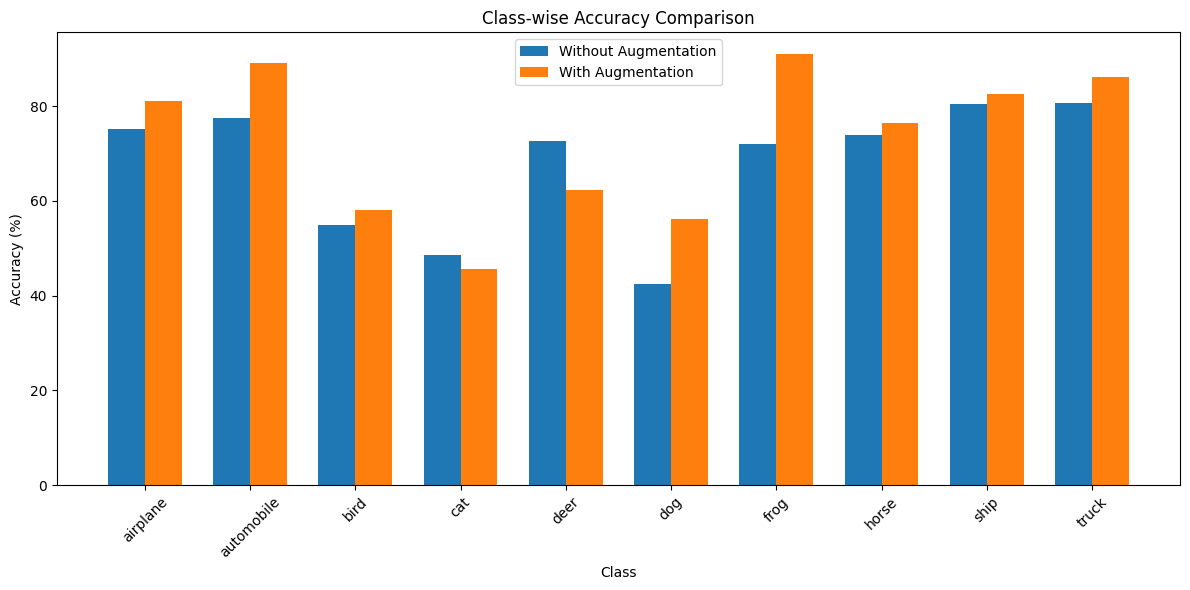

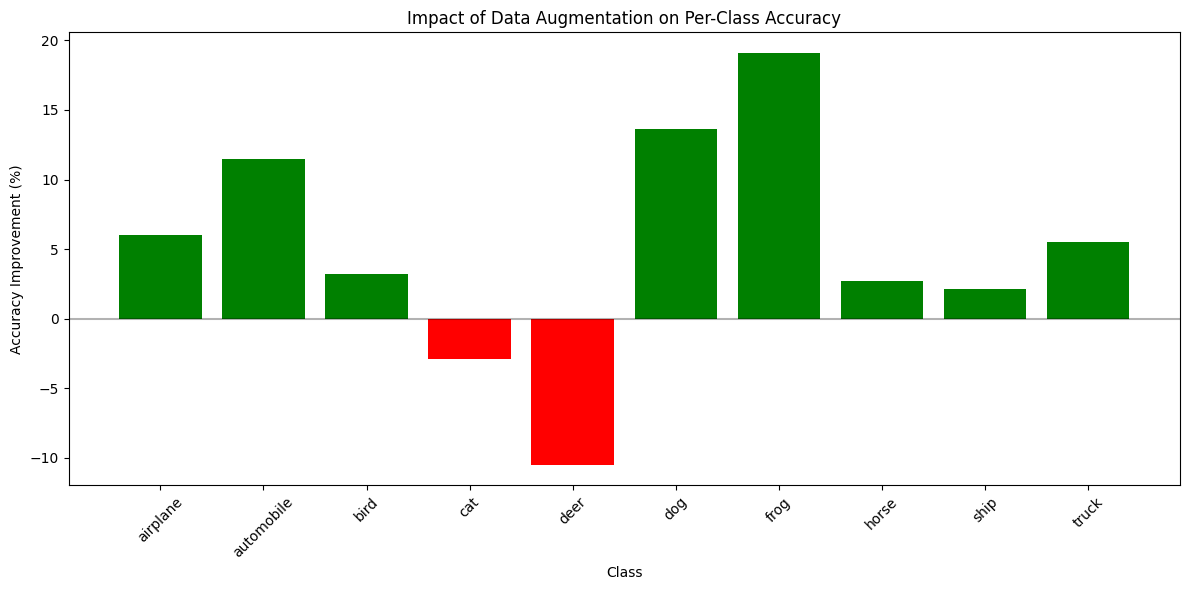


Class-wise Performance:
Class         Without Aug     With Aug   Difference
--------------------------------------------------
airplane           75.10%       81.10%       +6.00%
automobile         77.50%       89.00%      +11.50%
bird               54.90%       58.10%       +3.20%
cat                48.60%       45.70%       -2.90%
deer               72.70%       62.20%      -10.50%
dog                42.50%       56.10%      +13.60%
frog               71.90%       91.00%      +19.10%
horse              73.80%       76.50%       +2.70%
ship               80.40%       82.50%       +2.10%
truck              80.60%       86.10%       +5.50%


In [19]:

print("Classification Report - Without Augmentation:")
print(classification_report(y_true, y_pred_without_aug, target_names=class_names))

print("\nClassification Report - With Augmentation:")
print(classification_report(y_true, y_pred_with_aug, target_names=class_names))


metrics_without_aug = {
    'accuracy': accuracy_score(y_true, y_pred_without_aug),
    'precision': precision_score(y_true, y_pred_without_aug, average='weighted'),
    'recall': recall_score(y_true, y_pred_without_aug, average='weighted'),
    'f1': f1_score(y_true, y_pred_without_aug, average='weighted')
}

metrics_with_aug = {
    'accuracy': accuracy_score(y_true, y_pred_with_aug),
    'precision': precision_score(y_true, y_pred_with_aug, average='weighted'),
    'recall': recall_score(y_true, y_pred_with_aug, average='weighted'),
    'f1': f1_score(y_true, y_pred_with_aug, average='weighted')
}


print("\nModel Performance Comparison:")
print(f"{'Metric':<12} {'Without Aug':>12} {'With Aug':>12} {'Difference':>12}")
print("-" * 50)
for metric in metrics_without_aug.keys():
    diff = (metrics_with_aug[metric] - metrics_without_aug[metric]) * 100
    print(f"{metric:<12} {metrics_without_aug[metric]:>12.4f} {metrics_with_aug[metric]:>12.4f} {diff:>+11.2f}%")


def test_models_on_samples(num_samples=5):
    plt.figure(figsize=(15, 4*num_samples))
    for i in range(num_samples):
        
        # Pick a random test image
        idx = np.random.randint(0, len(x_test))
        img = x_test[idx]
        true_label = np.argmax(y_test[idx])
        
  
        pred_without_aug = np.argmax(model_without_aug.predict(np.expand_dims(img, axis=0))[0])
        pred_with_aug = np.argmax(model_with_aug.predict(np.expand_dims(img, axis=0))[0])
        
     
        plt.subplot(num_samples, 3, i*3+1)
        plt.imshow(img)
        plt.title(f"True: {class_names[true_label]}")
        plt.axis('off')
        
 
        plt.subplot(num_samples, 3, i*3+2)
        probs_without_aug = model_without_aug.predict(np.expand_dims(img, axis=0))[0]
        plt.bar(range(10), probs_without_aug)
        plt.xticks(range(10), class_names, rotation=90)
        plt.title(f"Without Aug: {class_names[pred_without_aug]}" + 
                 (" ✓" if pred_without_aug == true_label else " ✗"))
        plt.ylim(0, 1)
        
      
        plt.subplot(num_samples, 3, i*3+3)
        probs_with_aug = model_with_aug.predict(np.expand_dims(img, axis=0))[0]
        plt.bar(range(10), probs_with_aug)
        plt.xticks(range(10), class_names, rotation=90)
        plt.title(f"With Aug: {class_names[pred_with_aug]}" + 
                 (" ✓" if pred_with_aug == true_label else " ✗"))
        plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()


test_models_on_samples()


def analyze_class_performance():
    
    class_acc_without_aug = np.zeros(10)
    class_acc_with_aug = np.zeros(10)
    class_totals = np.zeros(10)
    
    for i in range(len(y_true)):
        true_class = y_true[i]
        class_totals[true_class] += 1
        if y_pred_without_aug[i] == true_class:
            class_acc_without_aug[true_class] += 1
        if y_pred_with_aug[i] == true_class:
            class_acc_with_aug[true_class] += 1
    
  
    class_acc_without_aug = (class_acc_without_aug / class_totals) * 100
    class_acc_with_aug = (class_acc_with_aug / class_totals) * 100
    class_acc_diff = class_acc_with_aug - class_acc_without_aug

    plt.figure(figsize=(12, 6))
    x = np.arange(10)
    width = 0.35
    
    plt.bar(x - width/2, class_acc_without_aug, width, label='Without Augmentation')
    plt.bar(x + width/2, class_acc_with_aug, width, label='With Augmentation')
    
    plt.xlabel('Class')
    plt.ylabel('Accuracy (%)')
    plt.title('Class-wise Accuracy Comparison')
    plt.xticks(x, class_names, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    plt.figure(figsize=(12, 6))
    plt.bar(x, class_acc_diff, color=['g' if d > 0 else 'r' for d in class_acc_diff])
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Class')
    plt.ylabel('Accuracy Improvement (%)')
    plt.title('Impact of Data Augmentation on Per-Class Accuracy')
    plt.xticks(x, class_names, rotation=45)
    plt.tight_layout()
    plt.show()
    
   
    print("\nClass-wise Performance:")
    print(f"{'Class':<12} {'Without Aug':>12} {'With Aug':>12} {'Difference':>12}")
    print("-" * 50)
    for i in range(10):
        print(f"{class_names[i]:<12} {class_acc_without_aug[i]:>11.2f}% {class_acc_with_aug[i]:>11.2f}% {class_acc_diff[i]:>+11.2f}%")


analyze_class_performance()


def show_misclassifications(class_index, num_samples=5):

    misclass_indices = np.where((y_true == class_index) & (y_pred_with_aug != class_index))[0]
    
    if len(misclass_indices) == 0:
        print(f"No misclassifications found for class {class_names[class_index]}")
        return
    
    
    plt.figure(figsize=(15, 3))
    for i in range(min(num_samples, len(misclass_indices))):
        idx = misclass_indices[i]
        img = x_test[idx]
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"True: {class_names[class_index]}\nPred: {class_names[y_pred_with_aug[idx]]}")
        plt.axis('off')
    
    plt.suptitle(f"Misclassified {class_names[class_index]} Images", fontsize=16)
    plt.tight_layout()
    plt.show()


worst_class_idx = np.argmin(metrics_with_aug['accuracy'])